<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# Changes from previous work

+ Restructuring of folders
+ Comment on scripts in more depth
+ Add more explanatory graphics
+ Evaluation of models with Standardised Confusion Matrix, Cumulative Gain Curve

# OBJECTIVE

* LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

* Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# TABLE OF CONTENTS
* [1.EDA and Feature Engineering](#EDA-and-Feature-Engineering)  
* [2.Feature engineering](#Feature-engineering)  
* [3.Categorical Features](#Categorical-Features)  
* [4.References](#References)  
* [5.Pipelines](#Pipelines)  

# EDA and Feature Engineering

### Gonzalo Rodríguez
### Mario Arteche

#### Load of packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import warnings

from sklearn.model_selection import train_test_split 

import pickle

warnings.filterwarnings("ignore")

In [2]:
path1 = '../data/Loan_training_set_1_4.csv'
path2 = '../data/Loan_training_set_2_4.csv'
path3 = '../data/Loan_training_set_3_4.csv'
path4 = '../data/Loan_training_set_4_4.csv'

### Loading  Datasets

In [3]:
df1 = pd.read_csv(path1, skiprows = 1, sep = ',')

df1.drop(df1.tail(2).index, inplace = True)

In [4]:
df2 = pd.read_csv(path2, skiprows = 1, sep = ',')

df2.drop(df2.tail(2).index, inplace = True)

In [5]:
df3 = pd.read_csv(path3, skiprows = 1, sep = ',')

df3.drop(df3.tail(2).index, inplace = True)

In [6]:
df4 = pd.read_csv(path4, skiprows = 1, sep = ',')

df4.drop(df4.tail(2).index, inplace = True)

 In order to work more efficiently, we join the datasets. We resort to the function concat.

In [7]:
df_g = pd.concat([df1, df2, df3, df4])

In [8]:
#cuando Diego nos entrege su dataset
#path1 = '../data/Loan_test_set.csv'
#df1 = pd.read_csv(path1, skiprows = 1, sep = ',')
#df1.drop(df1.tail(2).index, inplace = True)
#df_g = df1

### Duplicated Values

First of all, we want to make sure there are not duplicated values in our dataset, and observe the percentage of null values in the four dataframes.

  + With the function df_g.duplicated we check the presence of duplicated values

In [9]:
duplicated = df_g[df_g.duplicated(keep = False)]

In [10]:
duplicated.count()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                        ..
settlement_status        0
settlement_date          0
settlement_amount        0
settlement_percentage    0
settlement_term          0
Length: 151, dtype: int64

The function returns the following results. If we look at these results, we confirm that there are no duplicate values.

### Missing Values 

In [11]:
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df_g = pd.DataFrame({'column_name': df_g.columns,
                                 'percent_missing': percent_missing})

In [12]:
missing_value_df_g.sort_values('percent_missing', inplace=True, ascending = False)

Here we observe the percentage of nulls in each column.

In [13]:
missing_value_df_g.head(50)

,column_name,percent_missing
member_id,member_id,100.000000
orig_projected_additional_accrued_interest,orig_projected_additional_accrued_interest,99.743580
hardship_end_date,hardship_end_date,99.699280
hardship_amount,hardship_amount,99.699280
hardship_type,hardship_type,99.699280
hardship_reason,hardship_reason,99.699280
hardship_status,hardship_status,99.699280
hardship_last_payment_amount,hardship_last_payment_amount,99.699280
hardship_payoff_balance_amount,hardship_payoff_balance_amount,99.699280
hardship_loan_status,hardship_loan_status,99.699280


# Removing features

In a first instance, after having studied the dataset we decided to remove the following variables, as they take part in the following steps of the granting of credit. To make this decision we have drawn on our business knowledge.
The variables that we decided to remove beforehand, are the following ones.

In [14]:
df_g = df_g.drop(['acc_open_past_24mths', 
                  'dti',
                  'loan_amnt',
                  'total_pymnt',
                  'total_pymnt_inv',
                  'total_rec_int',
                  'total_rec_late_fee',
                  'total_rec_prncp',
                  'total_rev_hi_lim',
                  'chargeoff_within_12_mths',
                  'collection_recovery_fee',
                  'collections_12_mths_ex_med',
                  'debt_settlement_flag',
                  'delinq_2yrs',
                  'earliest_cr_line',
                  'funded_amnt_inv',
                  'id',
                  'inq_last_6mths',
                  'installment',
                  'issue_d',
                  'last_credit_pull_d',
                  'last_pymnt_amnt',
                  'last_pymnt_d',
                  'mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mths_since_recent_bc',
                  'mths_since_recent_inq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'open_acc',
                  'out_prncp',
                  'out_prncp_inv',
                  'policy_code',
                  'pub_rec_bankruptcies',
                  'recoveries',
                  'revol_bal',
                  'revol_util',
                  'tax_liens',
                  'term',
                  'total_il_high_credit_limit'], 
                 
                  axis='columns')

We almost have removed **50** columns

In [15]:
df = df_g
df.shape

(884876, 101)

Subsequently we decided to remove the columns with more or equal to **70% of NaN´s**, since they don't give us enough information to take their into account.

In [16]:
filtro_Nan = len(df) * .7
df.dropna(thresh = filtro_Nan, axis = 1, inplace = True)
df.shape

(884876, 43)

In [17]:
df.columns

Index(['funded_amnt', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'fico_range_low', 'fico_range_high', 'pub_rec',
       'total_acc', 'initial_list_status', 'last_fico_range_high',
       'last_fico_range_low', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op',
       'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'hardship_flag', 'disbursement_method'],
      dtype='object')

Let's check the number of NaN for the remanining columns and their types.

In [18]:
df_typ = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('NaN_values').reset_index(),
                     df.dtypes.to_frame('types').reset_index(),
                     on = 'index',
                     how = 'inner')
df_typ

,index,NaN_values,types
0,funded_amnt,0,float64
1,initial_list_status,0,object
2,hardship_flag,0,object
3,last_fico_range_low,0,float64
4,application_type,0,object
5,acc_now_delinq,0,float64
6,tot_coll_amt,0,float64
7,tot_cur_bal,0,float64
8,delinq_amnt,0,float64
9,mo_sin_rcnt_rev_tl_op,0,float64


Afterwards we print the principal statistics of our dataset to visulize the range of our main features and its distributions

In [19]:
round(df.describe(),3).T

,count,mean,std,min,25%,50%,75%,max
funded_amnt,884876.0,14975.072,8804.519,1000.0,8000.0,13000.0,20000.00,40000.0
annual_inc,884876.0,77102.415,135491.609,0.0,46000.0,65000.0,92000.00,110000000.0
fico_range_low,884876.0,694.699,30.936,660.0,670.0,685.0,710.00,845.0
fico_range_high,884876.0,698.699,30.937,664.0,674.0,689.0,714.00,850.0
pub_rec,884876.0,0.226,0.623,0.0,0.0,0.0,0.00,86.0
total_acc,884876.0,25.112,12.022,2.0,16.0,23.0,32.00,169.0
last_fico_range_high,884876.0,686.138,70.031,0.0,659.0,694.0,729.00,850.0
last_fico_range_low,884876.0,675.260,104.092,0.0,655.0,690.0,725.00,845.0
acc_now_delinq,884876.0,0.006,0.083,0.0,0.0,0.0,0.00,14.0
tot_coll_amt,884876.0,253.656,9942.521,0.0,0.0,0.0,0.00,9152545.0


 ## Distribution 

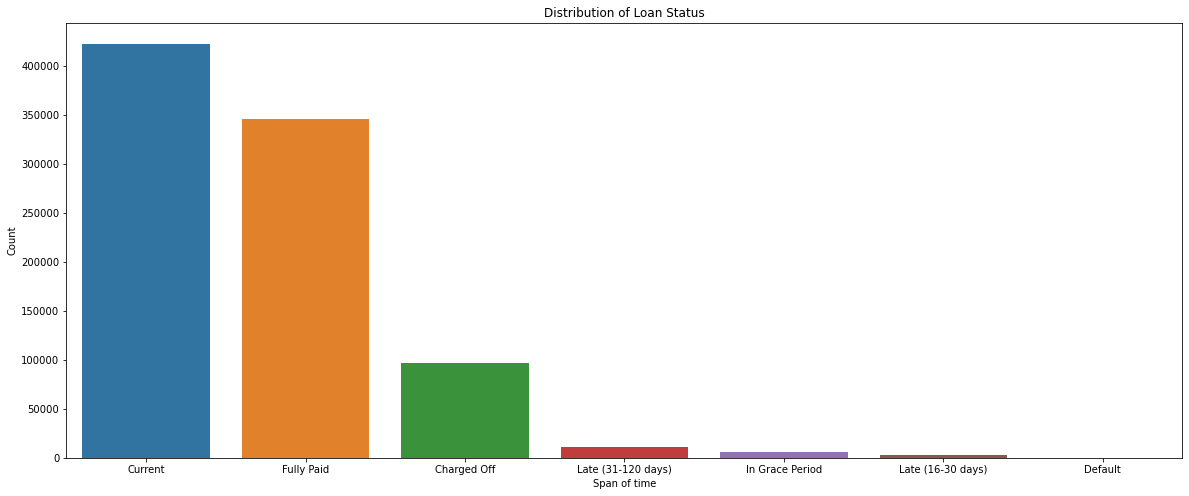

In [20]:
m =df_g['loan_status'].value_counts()
m = m.to_frame()
m.reset_index(inplace=True)
m.columns = ['Loan Status','Count']
plt.subplots(figsize=(20,8))
sns.barplot(y='Count', x='Loan Status', data=m)
plt.xlabel("Span of time")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.show()

# Feature engineering

In the following steps we will create a range of functions to clasify our cathegorical variables within a dummy structure

Firstly, we deal with our variable to be predicted, These consist of the following variables:
+ Fully Paid
+ Charged Off
+ In Grace Period
+ Late (31-120 days)
+ Late (16-30 days)
+ Current
+ Default  

We consider that **Fully Paid** means that the loan has been paid, while in the case of the other variables that had some kind of delay, we have considered as unpaid.  
Likewise, in the case of the **Current** variable, we have given it another value and then proceeded to delete it, given that it does not provide us with any information as far as prediction is concerned.

In [21]:
def target(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0
    elif x == 'In Grace Period':
        return 0
    elif x == 'Late (31-120 days)':
        return 0
    elif x == 'Late (16-30 days)':
        return 0
    elif x == 'Current':
        return 2
    elif x == 'Default':
        return 0

We corroborate that our function has worked properly

In [22]:
df['loan_status'] = df.loan_status.map(target)
df.loan_status.unique()

array([2, 1, 0], dtype=int64)

And delete the 2 in our dummy, as it includes the current status loans

In [23]:
df_unpaid = df[(df.loan_status == 1) | (df.loan_status == 0)]
df_unpaid.loan_status.unique()

array([1, 0], dtype=int64)

We want to see how imbalanced our sample is

In [24]:
distribution = pd.DataFrame({'observaciones' : df_unpaid['loan_status'].value_counts(),
                       'variable' : df_unpaid.loan_status.unique()}).sort_values(by = 'observaciones', ascending = False)
distribution

,observaciones,variable
1,345520,1
0,116671,0


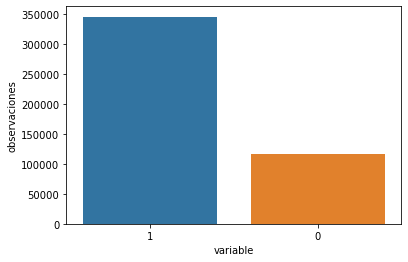

In [25]:
sns.barplot(x = distribution.variable, y =distribution.observaciones, order = distribution.variable);

We conclude that **75% and 25%** respectively seem to us to be the correct position for the **issue under discussion**

Afterward we **remove** a wide range of **variables** as we consider them unnecesary for our analysis. Since we consider that the information they give us is **not really relevant insight**.

In [26]:
df_unpaid.drop(['url', 'funded_amnt'], axis = 'columns', inplace = True)

In [27]:
df_unpaid.shape

df_unpaid.loan_status.unique()

array([1, 0], dtype=int64)

From now on, we will work separedtly the datasets that regards categorical features and numerical features. 

In a first step, we will define our numerical dataframe by dropping the columns that are not refered to this dataset.

In [28]:
df_n = df_unpaid.drop(['addr_state',
                       'application_type',
                       'disbursement_method',
                       'emp_length',
                       'loan_status',
                       'emp_title',
                       'grade',
                       'hardship_flag',
                       'home_ownership',
                       'initial_list_status',
                       'purpose',
                       'pymnt_plan',
                       'title',
                       'verification_status',
                       'sub_grade',
                       'zip_code'], axis = 1)

We want to see if there are only numerical variables in our data set

In [29]:
for variable in list(df_n.columns):
    print(variable + ' --> ' + str(df_n[variable].nunique()) + ' , data type '  + str(df_n[variable].dtype))

int_rate --> 200 , data type object
annual_inc --> 29484 , data type float64
fico_range_low --> 38 , data type float64
fico_range_high --> 38 , data type float64
pub_rec --> 27 , data type float64
total_acc --> 127 , data type float64
last_fico_range_high --> 72 , data type float64
last_fico_range_low --> 71 , data type float64
acc_now_delinq --> 7 , data type float64
tot_coll_amt --> 8479 , data type float64
tot_cur_bal --> 242649 , data type float64
avg_cur_bal --> 58056 , data type float64
bc_open_to_buy --> 51462 , data type float64
bc_util --> 1328 , data type float64
delinq_amnt --> 953 , data type float64
mo_sin_old_il_acct --> 478 , data type float64
mo_sin_rcnt_rev_tl_op --> 228 , data type float64
mort_acc --> 35 , data type float64
num_bc_sats --> 46 , data type float64
num_tl_120dpd_2m --> 5 , data type float64
pct_tl_nvr_dlq --> 544 , data type float64
percent_bc_gt_75 --> 196 , data type float64
tot_hi_cred_lim --> 250593 , data type float64
total_bal_ex_mort --> 128944 ,

We  transform interest rate into numeric, and we delete the percentage symbol

In [30]:
df_n['int_rate'] = df_n.int_rate.str.strip('%').astype(float)
df_n.int_rate.head(5)

8      7.35
10    24.85
24     7.35
42    16.02
91    16.02
Name: int_rate, dtype: float64

### Correlation matrix



<AxesSubplot:>

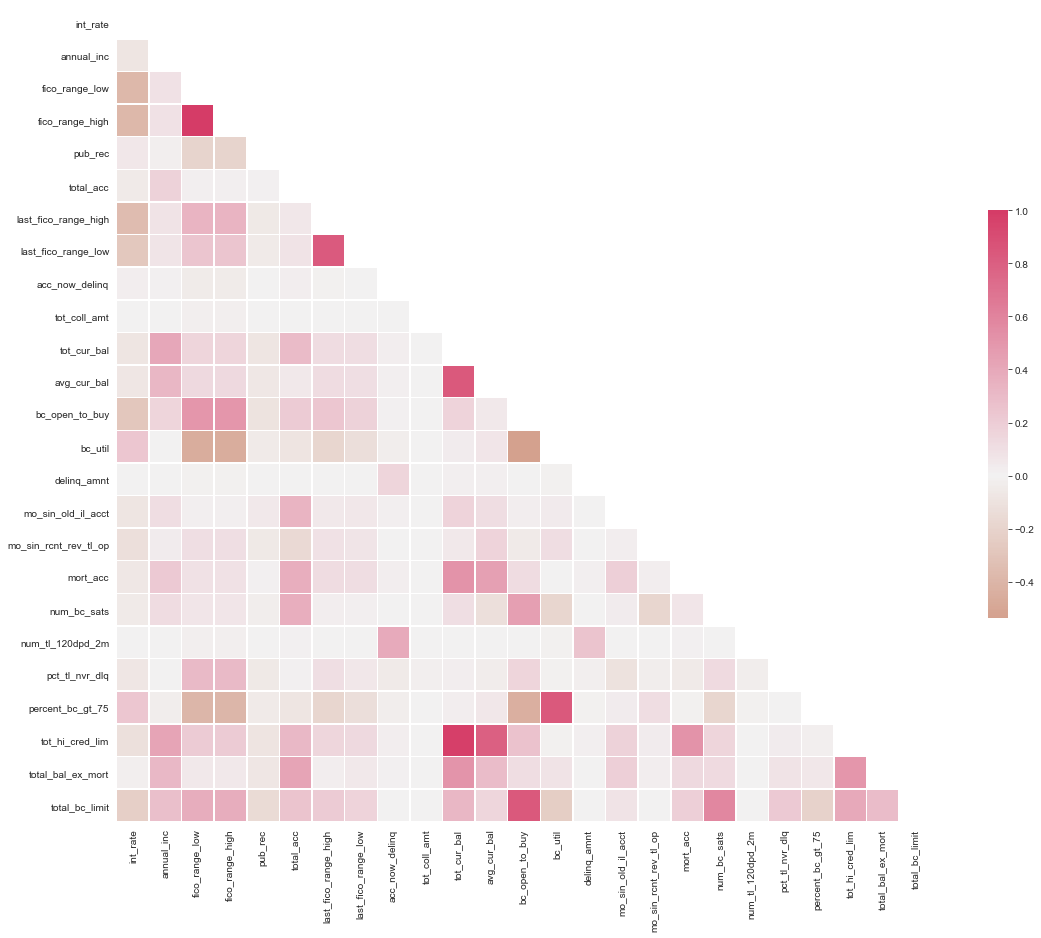

In [31]:
corr = df_n.corr()

mask = np.zeros_like(corr, dtype=np.bool) #para quitar la parte superior de la matriz 
mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'white') #para que no se vean los cuadrados que sobran 


f, ax = plt.subplots(figsize=(20, 15)) #dibujamos el lienzo 

cmap = sns.diverging_palette(24,1,as_cmap = True) # gama de colores

sns.heatmap(corr, mask=mask, cmap = cmap,
            vmax = 1,
            center = 0,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}) 

+ Low correlation in almost all variables except for FICO values.
+ So we decided not to eliminate any of the variables in concern



After carefully observing the data set, we define our categorical dataframe.

In [32]:
df_categorical = df_unpaid.loc[:,['addr_state',
                        'application_type',
                        'disbursement_method',
                        'emp_length',
                        'emp_title',
                        'grade',
                        'hardship_flag',
                        'home_ownership',
                        'initial_list_status',
                        'loan_status',
                        'purpose',
                        'pymnt_plan',
                        'title',
                        'verification_status',
                        'sub_grade',
                        'zip_code']]

In [33]:
df_categorical.drop(['addr_state',
           'disbursement_method',
           'initial_list_status',
           'title',
           'sub_grade',
           'emp_title',
           'zip_code'], axis = 'columns', inplace = True)

We define some fuctions to transform the following categorical features into binary features, sincem we cannot use them in predictive models in the state they are now.

First, we will make the `apllication type` take *two values*.

+ **0** If only one person whose request the loan

+ **1** a group of two or more people request the loan

In [34]:
df_categorical['application_type'] = df_categorical.application_type.map(lambda x: 0 if ( x == 'Individual')  else 1)

Secondly, another of the most important things when applying for a loan, is the time the applicant has been working, so we will separate this into 3 groups.

+ **0** When the applicant has been working for a maximum of 4 years.
+ **1** When the applicant has been working for 5 to 9 years.
+ **2** When the applicant has been working for more than 10 years.

In [35]:
def años(x):
    if (x == '1 year') | (x == '2 years') | (x == '3 years') | (x == '4 years'):
        return 0
    elif (x == '5 year') | (x == '6 years') | (x == '7 years') | (x == '8 years') | (x == '9 years'):
        return 1
    elif x == '10+ years':
        return 2


We apply this function to `emp_length`. Additionally, we will consider **NaN** values as if borrowers have not ever worked, so we will remove then. 

In [36]:
df_categorical['emp_length'] = df_categorical.emp_length.map(años)

df_categorical['emp_length'] = df_categorical.emp_length.fillna(0)

In [37]:
df_categorical.emp_length.unique()

array([1., 0., 2.])

The `grade` is a variable that indicates the risk of non-payment by the applicant, in this case going from A that are the lowest risk to default to G with the highest risk to default.

+ So we will put a **0** to the ones that have lower risk to default.
+ **1** When the risk of default becomes higher.

In [38]:
def riesgo(x):
    if (x == 'A') | (x == 'B') | (x == 'C'):
        return 0
    elif (x == 'D') | (x == 'E') | (x == 'F') | (x == 'G'):
        return 1

In [39]:
df_categorical['grade'] = df_categorical.grade.map(riesgo)

In [40]:
df_categorical.grade.unique()

array([0, 1], dtype=int64)

On the other hand, it is important to know if the applicant has mortgages, if he owns a house, etc.

In [41]:
df_g.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY', 'NONE'], dtype=object)

In this case we will set the `home_ownership` variable as a binary feature:

+ **0** When the applicant does not own any housing (including rental housing).
+ **1** When the applicant has a mortgage or owns a property.



In [42]:
def propiedad(x):
    if (x == 'OWN') | (x == 'MORTGAGE'):
        return 1
    else:
        return 0

In [43]:
df_categorical['home_ownership'] = df_categorical.home_ownership.map(propiedad)

In [44]:
df_categorical.home_ownership.unique()

array([1, 0], dtype=int64)

As far as the purpose of the application is concerned, we have separated it into three groups.

In [45]:
df_categorical.purpose.unique()

array(['credit_card', 'debt_consolidation', 'home_improvement', 'other',
       'major_purchase', 'moving', 'medical', 'car', 'vacation',
       'small_business', 'house', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

Will be codified as:
    
+ **0** When the applicant needs the loan  for medical issues, debt payments or entrepreneurship.
+ **1** When the applicant  wants the loan for credit card request, or life improvement matters such as buying a car, house or making an home improvement.
+ **2** When the applicant wants to use the loan for personal matters.
    

In [46]:
def proposito(x):
    if (x == 'small_business') | (x == 'debt_consolidation') | (x == 'major_purchase' ) | (x == 'medical'):
        return 0
    elif (x == 'credit_card') | (x == 'home_improvement') | (x == 'house') | (x == 'car'):
        return 1
    else:
        return 2

In [47]:
df_categorical['purpose'] = df_categorical.purpose.map(proposito)

In [48]:
df_categorical.purpose.unique()

array([1, 0, 2], dtype=int64)

When it comes to `payment plan`:
+ We will codify as **0** if the applicant has not requested a payment plan.
+ **1** In other case

In [49]:
df_categorical['pymnt_plan'] = df_categorical.pymnt_plan.map(lambda x: 0 if (x == 'n') else 1)

In [50]:
df_categorical.pymnt_plan.unique()

array([0, 1], dtype=int64)

Regarding, the `verification_status` we will codify **0** if the income of the applicant have not been verified and **1** in the case it have been verified .

In [51]:
df_categorical['verification_status'] = df_categorical.verification_status.map(lambda x: 0 if (x == 'Not Verified') else 1)

In [52]:
df_categorical.verification_status.unique()

array([0, 1], dtype=int64)

We have to consider `hardship_flag` whether or not the applicant is in a hardship plan with the credit company or bank.

In [53]:
df_categorical['hardship_flag'] = df_categorical.hardship_flag.map(lambda x: 0 if (x == 'N') else 1)

In [54]:
df_categorical['hardship_flag'].unique()

array([0, 1], dtype=int64)

After the feature engineering, we want to check if everything have worked as expected.

In [55]:
df_categorical.head(5)

,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
8,0,1.0,0,0,1,1,1,0,0
10,0,0.0,1,0,0,1,0,0,1
24,0,1.0,0,0,1,1,0,0,0
42,0,1.0,0,0,0,1,0,0,1
91,0,1.0,0,0,1,1,0,0,1


After working wiht the categorical features we tranform them into object type.

In [56]:
df_c = df_categorical.astype('object')

In [57]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 421094
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   application_type     462191 non-null  object
 1   emp_length           462191 non-null  object
 2   grade                462191 non-null  object
 3   hardship_flag        462191 non-null  object
 4   home_ownership       462191 non-null  object
 5   loan_status          462191 non-null  object
 6   purpose              462191 non-null  object
 7   pymnt_plan           462191 non-null  object
 8   verification_status  462191 non-null  object
dtypes: object(9)
memory usage: 35.3+ MB


In [58]:
df_c.loan_status.unique()

array([1, 0], dtype=object)

Since we worked with categorical features and numerical features, we joined the two dataframes. 

In [59]:
df_unido = pd.DataFrame(pd.concat([df_n, df_c], axis = 1))

In [60]:
df_unido.to_csv("../data/df_unido.csv")

After data treatment lets see a brief **EDA** to get know better the dataset and how is distributed.

# Categorical Features

In this case, when the feauture `home_ownership` takes the value of 1 means that the person owns a house, elsewhere it does not.

<AxesSubplot:xlabel='loan_status'>

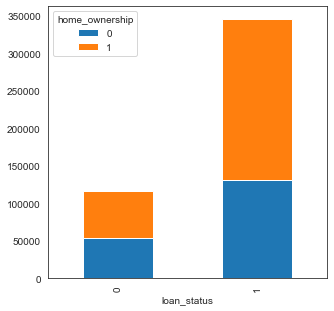

In [61]:

home_ownership = pd.crosstab(index=df_unido["loan_status"], columns=df_unido["home_ownership"])


home_ownership.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

As is expected there is more people that pays the loan that own a house.

#### GRADE VS LOAN STATUS

We have grouped the client's rating  (`grade`) into two groups, on the one hand the most solvent and on the other the least solvent. We represent with 0, those with the best rating, and with 1 those with the "worst" rating. Obviously, in the case of loan repayment, those who predominate are those who are most solvent.

<AxesSubplot:xlabel='loan_status'>

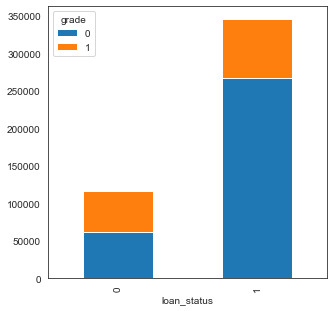

In [62]:

grade = pd.crosstab(index=df_unido["loan_status"], columns=df_unido["grade"])

grade.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

##### EMP_LENGTH VS LOAN_STATUS

In the following graph, we represent with 0 those who have been working for up to 4 years, with 1 those who have been working for up to 9 years and with 10 those who have been working for more than 10 years.

Contrary to what is expected, since we assume that the greater the number of years working, the greater the savings.

<AxesSubplot:xlabel='loan_status'>

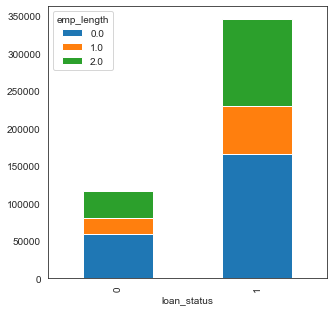

In [63]:

emp_length = pd.crosstab(index=df_unido["loan_status"], columns=df_unido["emp_length"])


emp_length.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

## Splitting of Data

In [64]:
X = df_unido.drop('loan_status', axis=1)
y = df_unido['loan_status']
Y = y.astype(int)

In [65]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 421094
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   int_rate               462191 non-null  float64
 1   annual_inc             462191 non-null  float64
 2   fico_range_low         462191 non-null  float64
 3   fico_range_high        462191 non-null  float64
 4   pub_rec                462191 non-null  float64
 5   total_acc              462191 non-null  float64
 6   last_fico_range_high   462191 non-null  float64
 7   last_fico_range_low    462191 non-null  float64
 8   acc_now_delinq         462191 non-null  float64
 9   tot_coll_amt           462191 non-null  float64
 10  tot_cur_bal            462191 non-null  float64
 11  avg_cur_bal            462185 non-null  float64
 12  bc_open_to_buy         457303 non-null  float64
 13  bc_util                456978 non-null  float64
 14  delinq_amnt            462191 non-nu

In [66]:

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.3,
                                                    random_state=1234)

In [ ]:
x_train.to_csv('../data/x_train.csv', index=False)
x_test.to_csv('../data/x_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

In [ ]:
x_train.head()

## Pipelines

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
numeric_features = df_unido.select_dtypes(include=['int64', 'float64','int32']).columns

In [ ]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),])

In [ ]:
pl2 = '../pipelines/tratamiento1.sav'

pickle.dump(preprocessor1, open(pl2, 'wb'))

# References

* https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db
* https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 
* https://medium.com/@benfenison/gridsearching-a-random-forest-classifier-fc225609699c 
* https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf